In [1]:
# =============================================
# Module 4 - Time Series & Forecasting
# Project 1: Time Series Exploration — Prices, Returns & Rolling Statistics
# =============================================

# Author: Rein | Pixel Sky Solutions
# Course: Python–Finance Master Plan
# ---------------------------------------------
# In this notebook, we introduce time series analysis
# by working with simulated stock prices and returns.
# We'll explore rolling statistics & visualize trends.
# ---------------------------------------------

In [2]:
# 📦 Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Make plots consistent
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

In [4]:
# ===============================
# 1️⃣ Generate Synthetic Stock Price Data
# ===============================

In [5]:
# 🔎 Explanation:
# We'll simulate daily stock prices using a geometric Brownian motion process.
# This mimics how stocks evolve with drift (μ) and volatility (σ).

In [7]:
np.random.seed(42)
n_days = 500   # ~2 years of trading
mu = 0.0005    # daily drift
sigma = 0.02   # daily volatility

In [8]:
# Daily returns from normal distribution
daily_returns = np.random.normal(mu, sigma, n_days)

In [9]:
# Price path (starting at 100)
price = 100 * (1 + daily_returns).cumprod()

In [10]:
# Put into DataFrame
df = pd.DataFrame({
    "Price": price,
    "Return": daily_returns,
    "Log Return": np.log(1 + daily_returns)
})
df.head()

,Price,Return,Log Return
0,101.043428,0.010434,0.010380
1,100.814536,-0.002265,-0.002268
2,102.170872,0.013454,0.013364
3,105.334143,0.030961,0.030491
4,104.893523,-0.004183,-0.004192


C:\Users\moonw\AppData\Local\Temp\ipykernel_15720\2929352791.py:11: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\moonw\AppData\Local\Temp\ipykernel_15720\2929352791.py:12: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.savefig("charts/project1_stock_price.png")


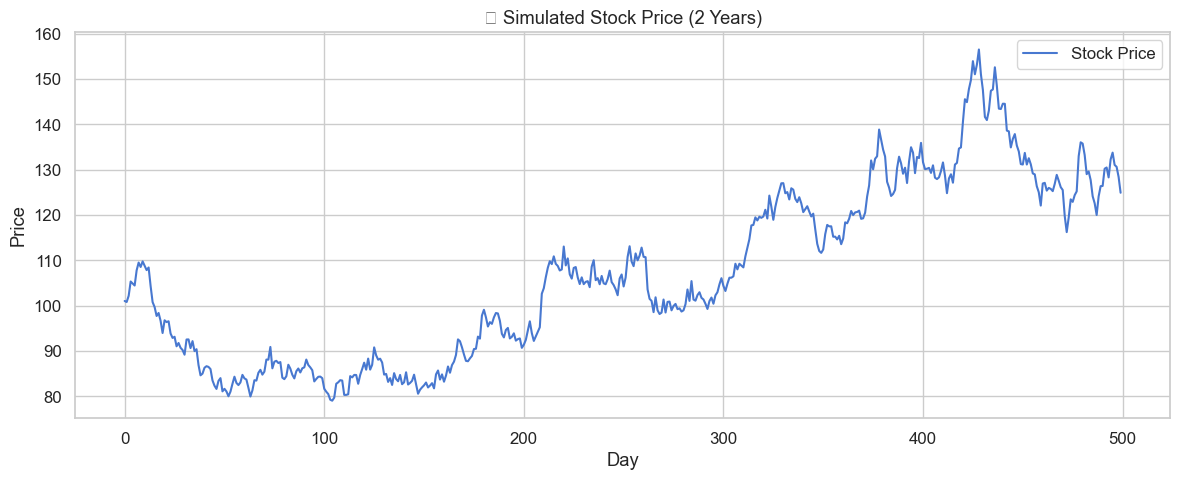

In [14]:
# ===============================
# 2️⃣ Visualize Stock Price Time Series
# ===============================

plt.figure(figsize=(12,5))
plt.plot(df["Price"], label="Stock Price")
plt.title("📈 Simulated Stock Price (2 Years)")
plt.xlabel("Day")
plt.ylabel("Price")
plt.legend()
plt.tight_layout()
plt.savefig("charts/project1_stock_price.png")
plt.show()

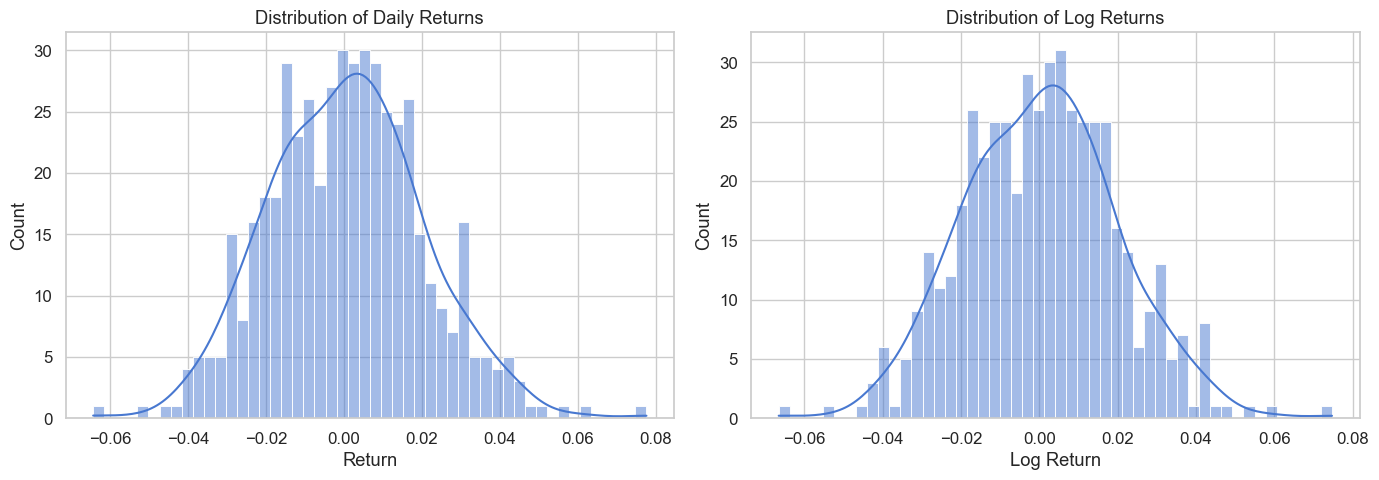

In [15]:
# ===============================
# 3️⃣ Returns & Log-Returns
# ===============================

fig, ax = plt.subplots(1,2, figsize=(14,5))

sns.histplot(df["Return"], bins=50, kde=True, ax=ax[0])
ax[0].set_title("Distribution of Daily Returns")
ax[0].set_xlabel("Return")

sns.histplot(df["Log Return"], bins=50, kde=True, ax=ax[1])
ax[1].set_title("Distribution of Log Returns")
ax[1].set_xlabel("Log Return")

plt.tight_layout()
plt.savefig("charts/project1_returns_distribution.png")
plt.show()

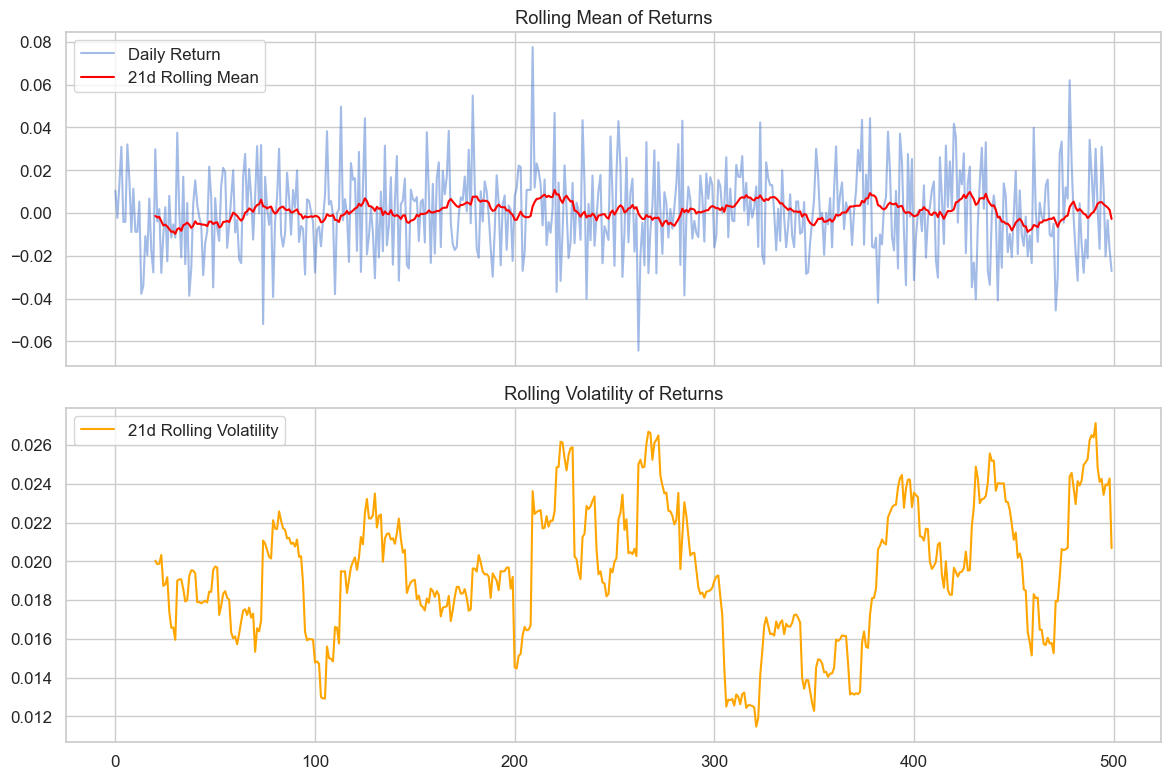

In [16]:
# ===============================
# 4️⃣ Rolling Statistics (Mean & Volatility)
# ===============================

# Rolling mean & rolling volatility (window=21 ~ 1 month)
df["Rolling Mean"] = df["Return"].rolling(21).mean()
df["Rolling Volatility"] = df["Return"].rolling(21).std()

fig, ax = plt.subplots(2,1, figsize=(12,8), sharex=True)

ax[0].plot(df["Return"], alpha=0.5, label="Daily Return")
ax[0].plot(df["Rolling Mean"], color="red", label="21d Rolling Mean")
ax[0].set_title("Rolling Mean of Returns")
ax[0].legend()

ax[1].plot(df["Rolling Volatility"], color="orange", label="21d Rolling Volatility")
ax[1].set_title("Rolling Volatility of Returns")
ax[1].legend()

plt.tight_layout()
plt.savefig("charts/project1_rolling_stats.png")
plt.show()

In [18]:
# ===============================
# ✅ Wrap-Up
# ===============================

# Key takeaways:
# - Prices evolve as a random walk with drift (stochastic process).
# - Returns are noisy but centered around a mean.
# - Rolling statistics help detect changing market conditions (volatility clustering).
# - This foundation is critical for time series forecasting in finance.

print("✅ Project 1 Complete: Charts saved to PHASE1/MODULE-4/charts/")

✅ Project 1 Complete: Charts saved to PHASE1/MODULE-4/charts/
